## Getting hands dirty!

In this section, we would see how to use deep learning for some of the supervised learning task. To this end, we are using Colaboratory from Google Inc.

Colaboratory notebooks are stored in [Google Drive](https://drive.google.com) and can be shared just as you would with Google Docs or Sheets. Colaboratory is free to use.

For more information, see our [FAQ](https://research.google.com/colaboratory/faq.html).

## Linear Regression

Suppose our task was to do regression. Remember from the class, how linear separators assist us in this. For this exercise, we do not need any neural network; simple linear algebra would suffice.

### Import the modules

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

### Set some hyperparameters

Remember we discussed in the class how setting up hyper-parameters could be a non-trivial task. Our current example is simple hence we would not bother too much on it. In any real world application, the number of hyper-parameters and their sensitivities can determine which approach we end up choosing.

In [0]:
# Hyper parameters
alpha = 0.01  # learning rate
training_epochs = 1000  # number of epochs we do the learning
display_step = 25 # display results after these steps; not a hyperparameter actually

### Prepare the data : X --> Y

For any input $x \in {\cal X}$, we have an output $y \in {\cal Y}$. Our learning objective is to find the mapping ${\cal X} \mapsto {\cal Y}$. Hopefully there exists one. However, we have no way to know since all we have is the training data $(X_{tr}, Y_{tr})$ where $X_{tr} \subset {\cal X}$ and $Y_{tr} \subset {\cal Y}$.

In [0]:
sample_sz = 25
X_tr = 10. * np.random.rand(sample_sz)
Y_tr = 3.14 * X_tr + 0.1 * np.random.randn(sample_sz)

### Construct the computation graph



In [0]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

# set the parameters i.e., weights and bias
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

### Define the model for regression

We assume a linear model of the form: $\hat y = wx + b$

In [0]:
Y_hat = tf.add(tf.multiply(X, W), b)

### Define the cost function and optimizer

We learnt in the class how a helpful cost function can also us efficient calculation of gradients and thus in implementing the gradient descent. Our model is linear, so this is quite a kosher thing to do. We will use vanilla gradient descent.

In [0]:
# cost  = Mean squared error
J = tf.reduce_sum(tf.pow(Y_hat-Y, 2))/(2*sample_sz)

# gradient descent with a learnig rate alpha
optimizer = tf.train.GradientDescentOptimizer(alpha).minimize(J)

### Initialise all the variable

This is tensorflow specific thing.

In [0]:
init = tf.global_variables_initializer()

## Evaluate the computation graph (not just once!)

The overall idea of using the DL framework is to enable us harness optimized matrix operations: paralleized and utilizing GPU cores if possible. Tensorflow session acheives that.

Epoch: 0025 cost= 0.021476502 W= 3.1752653 b= -0.29070434
Epoch: 0050 cost= 0.019345645 W= 3.173434 b= -0.26779425
Epoch: 0075 cost= 0.017546313 W= 3.1702046 b= -0.2467958
Epoch: 0100 cost= 0.016000241 W= 3.1672099 b= -0.22733036
Epoch: 0125 cost= 0.014671821 W= 3.1644337 b= -0.20928557
Epoch: 0150 cost= 0.013530399 W= 3.1618602 b= -0.1925587
Epoch: 0175 cost= 0.012549644 W= 3.159475 b= -0.17705296
Epoch: 0200 cost= 0.011706948 W= 3.1572623 b= -0.1626791
Epoch: 0225 cost= 0.010982907 W= 3.1552138 b= -0.14935443
Epoch: 0250 cost= 0.010360821 W= 3.1533124 b= -0.1370027
Epoch: 0275 cost= 0.009826275 W= 3.1515498 b= -0.12555234
Epoch: 0300 cost= 0.009367042 W= 3.149918 b= -0.11493807
Epoch: 0325 cost= 0.008972486 W= 3.148404 b= -0.10509899
Epoch: 0350 cost= 0.008633447 W= 3.1470006 b= -0.095977515
Epoch: 0375 cost= 0.008342233 W= 3.1457002 b= -0.08752236
Epoch: 0400 cost= 0.008092014 W= 3.1444948 b= -0.07968464
Epoch: 0425 cost= 0.007877034 W= 3.1433768 b= -0.07241875
Epoch: 0450 cost= 0.0

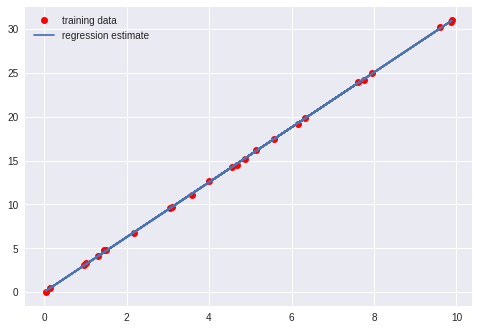

In [0]:
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(X_tr, Y_tr):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        if (epoch+1) % display_step == 0:
            j = sess.run(J, feed_dict={X: X_tr, Y:Y_tr})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(j), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("End of training.")
    J_tr = sess.run(J, feed_dict={X: X_tr, Y: Y_tr})
    print ("Training cost=", J_tr, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(X_tr, Y_tr, 'ro', label='training data')
    plt.plot(X_tr, sess.run(W) * X_tr + sess.run(b), label='regression estimate')
    plt.legend()
    plt.show()

## For more information:
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Markdown guide](/notebooks/markdown_guide.ipynb)
- [Charts](/notebooks/charts.ipynb)
- [Widgets](/notebooks/widgets.ipynb)
- [Loading and saving data: local files, Drive, Sheets, Google Cloud Storage](/notebooks/io.ipynb)
- [Example Google Cloud BigQuery notebook](/notebooks/bigquery.ipynb)
- [TensorFlow with GPU](/notebooks/gpu.ipynb)